<a href="https://colab.research.google.com/github/xhackerino/DataAnalysisLab_1/blob/main/Lab1_Rakin_Ilya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1 (numpy + matplotlib)

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
* На вход программа должна принимать 2 строки (т.е. должен быть реализован ввод с клавиатуры). Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.
* Систему уравнений необходимо решить матричным способом. Предусмотрите случаи, когда решения есть, решений нет, решений бесконечно много. Выведите ответ. Покажите решение на графике. Если решения есть, постройте график и точкой отметьте решение (если оно одно, например, функцией [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)). ГРАФИК СТРОИТСЯ ВО ВСЕХ ТРЕХ РАССМАТРИВАЕМЫХ СЛУЧАЯХ.

Enter 'a_11, a_12, b_1' multipliers for first equation: 1 2 3
Enter 'a_21, a_22, b_2' multipliers for second equation: 4 5 6

The result is: 
 [[-1.]
 [ 2.]]
Number of solutions:  1


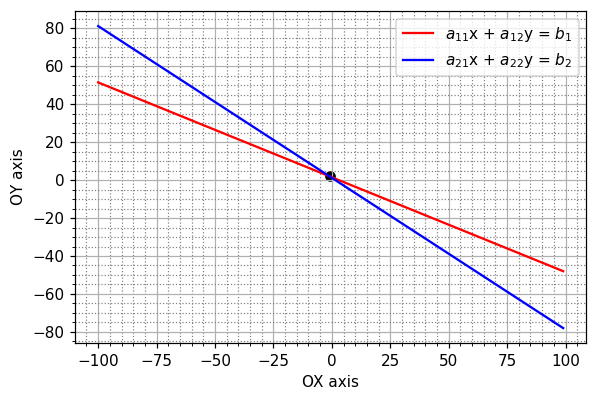

In [64]:
from scipy.linalg.misc import LinAlgError
from numpy import linalg as lg
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import solve

a11,a12,b1=map(int,input("Enter 'a_11, a_12, b_1' multipliers for first equation: ").split())
a21,a22,b2=map(int,input("Enter 'a_21, a_22, b_2' multipliers for second equation: ").split())

if a12 != 0 and a22 != 0:
  x_range = list(range(-100,100))
  y1 = [((b1-a11*x1)/a12) for x1 in x_range]
  y2 = [((b2-a21*x2)/a22) for x2 in x_range]
else:
  y_range = list(range(-100,100))
  x1 = [((b1-a12*y1)/a11) for y1 in y_range]
  x2 = [((b2-a22*y2)/a21) for y2 in y_range]

eq_1 = np.array([
    [a11, a12], 
    [a21, a22]
    ])
eq_2 = np.array([b1, b2]).reshape((2,1))

fig, ax = plt.subplots()

try:
  res = solve(eq_1,eq_2)
  print("\nThe result is: \n", res)
  print("Number of solutions: ", int(len(res)/2))
  plt.plot(x_range, y1, c = 'red')
  plt.plot(x_range, y2, c = 'blue')
  ax.scatter(res[0], res[1], color='black')
  ax.grid(which='major')
  ax.minorticks_on() 
  ax.grid(which='minor',
          c='gray',
          linestyle=':')
  plt.xlabel(r"OX axis")
  plt.ylabel(r"ОY axis")
  plt.legend([
            r"$a_{11}$x + $a_{12}$y = $b_{1}$",
            r"$a_{21}$x + $a_{22}$y = $b_{2}$",
            ])
  fig.set_dpi(110)

except LinAlgError as lae:
  eq_1 = np.array([
    [a11, a12], 
    [a21, a22]
    ])
  eq_2 = np.array([
    [a11, a12], 
    [a21, a22],
    [b1, b2]
    ])
  if lg.matrix_rank(eq_2) > lg.matrix_rank(eq_1):
    print("\nYou've got zero results.")
    print("\nGraphics are parallel, then there are no any solutions")
    plt.plot(x_range,y1, c = 'red')
    plt.plot(x_range,y2,  c = 'blue')
    ax.grid(which='major')
    ax.minorticks_on() 
    ax.grid(which='minor',
          c='gray',
          linestyle=':')
    plt.xlabel(r"OX axis")
    plt.ylabel(r"ОY axis")
    plt.legend([
              r"$a_{11}$x + $a_{12}$y = $b_{1}$",
              r"$a_{21}$x + $a_{22}$y = $b_{2}$",
              ])
    fig.set_dpi(110)  
  else:
    print("\nYou've got infinity number of solutions.")
    print("Btw graphics are identical, so there are infinity solutions...\n")
    plt.plot(x_range,y1, c = 'red')
    plt.plot(x_range,y2,  c = 'blue')
    ax.grid(which='major')
    ax.minorticks_on() 
    ax.grid(which='minor',
          c='gray',
          linestyle=':')
    plt.xlabel(r"OX axis")
    plt.ylabel(r"ОY axis")
    plt.legend([
              r"$a_{11}$x + $a_{12}$y = $b_{1}$",
              r"$a_{21}$x + $a_{22}$y = $b_{2}$",
              ])
    fig.set_dpi(110)

# Задание 2 (pytorch + matplotlib)

Пусть $f(x) = \sin(x) * x$. Постройте график $f(x)$ и $\frac{df(x)}{dx}$, для расчета производных воспользуйтесь методом `backward()` и matplotlib для построения графиков.

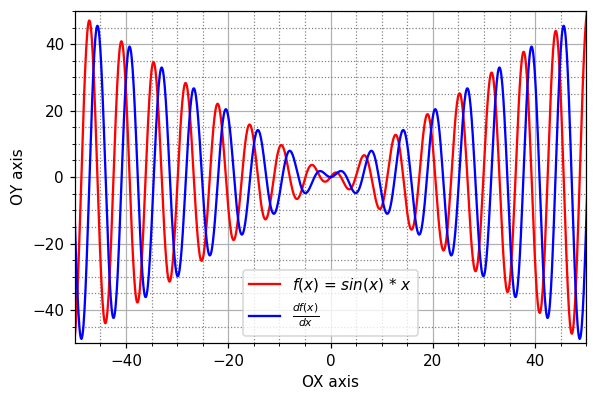

In [63]:
import torch
from torch import autograd
from matplotlib import pyplot as plt
import numpy as np


f = np.array([0.]*100000)
m = np.array([0.]*100000)

for i in range(-len(f)//2, (len(f)//2)):
  x = torch.tensor(i*0.1, requires_grad = True)
  y = torch.sin(x)*x
  y.backward()
  f[i] = x.grad.item()
  m[i] = y.item()

x = np.array([0.]*100000)

for i in range(-len(x)//2, (len(x) // 2)+1):
  x[i] = i * 0.1
 

fig, ax = plt.subplots()
ax.set(xlim=(-50, 50), ylim=(-50, 50))
ax.plot(x, f, c='red')
ax.plot(x, m, c = 'blue')
ax.grid(which='major')
ax.minorticks_on() 
ax.grid(which='minor',
        c='gray',
        linestyle=':')
plt.xlabel(r"OX axis")
plt.ylabel(r"ОY axis")
plt.legend([
            r"$f(x)$ = $sin(x)$ * ${x}$",
            r"$\frac{df(x)}{dx}$",
            ])
fig.set_dpi(110)

-101
